In [1]:
from local_lib.dataset import retreiveDatasetFromCsv
from local_lib.flatten_transformer import FlattenTransformer
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.model_selection import train_test_split
from local_lib.non_zero_transformer import NonZeroTransformer
from local_lib.mask_transformer import MaskSeuilTransformer
from local_lib.flatten_transformer import FlattenTransformer
from local_lib.dimension_transformer import DimensionTransformer
import numpy as np
from sklearn.decomposition import PCA

dataset = retreiveDatasetFromCsv()
dataset = dataset.sample(frac=1, random_state=42)

pipeline = Pipeline([
    ('flatten_tr', FlattenTransformer()),
    ('non_zero_tr', NonZeroTransformer()),
    ('mask_tr', MaskSeuilTransformer(strategy="combined"))])

In [2]:
# Fit and transform data
X = pipeline.fit_transform(dataset["pixel_value"])
y = np.array(list(dataset["class"]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [3]:
import numpy as np

y_train = y_train.reshape(1, -1)
y_test = y_test.reshape(1, -1)
X_train_reshaped = X_train.T
X_test_reshaped = X_test.T

In [4]:
import copy

# Make a copy of the list
y_train_simpler = copy.deepcopy(y_train)
y_train_simpler[y_train_simpler == 2] = 1

y_test_simpler = copy.deepcopy(y_test)
y_test_simpler[y_test_simpler == 2] = 1

print(np.unique(y_train_simpler))
print(np.unique(y_test_simpler))

[0 1]
[0 1]


In [5]:
import numpy as np

# Création de la matrice identité
identity_matrix = np.eye(3)
identity_matrix_simpler = np.eye(2)

# Transformation de t1 en t2
y_train_reshaped = identity_matrix[y_train[0]].T
y_test_reshaped = identity_matrix[y_test[0]].T

y_train_simpler_reshaped = identity_matrix_simpler[y_train_simpler[0]].T
y_test_simpler_reshaped = identity_matrix_simpler[y_test_simpler[0]].T

print(y_train_simpler_reshaped.shape)
print(y_test_simpler_reshaped.shape)

(2, 4684)
(2, 1172)


In [6]:
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.preprocessing import MinMaxScaler

pipeline = Pipeline([
    ('MinMaxScaler', MinMaxScaler())])

X_train_scaled = pipeline.fit_transform(X_train_reshaped)
X_test_scaled = pipeline.fit_transform(X_test_reshaped)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(35860, 4684)
(35860, 1172)


In [7]:
print(X_train_scaled.min())
print(X_train_scaled.max())

0.0
1.0


In [8]:
from local_lib.neural_network_classic_batch import NeuralNetworkMultiLayerClassicStrat
mnn = NeuralNetworkMultiLayerClassicStrat(X_train_scaled, y_train_simpler_reshaped, dimensions=tuple([32]), n_iter=1000, lr=0.05, strategy="sub", sub_parts=5)
hist = mnn.fit(X_train_scaled, X_test_scaled, y_train_simpler_reshaped,y_test_simpler_reshaped)

100%|██████████| 199/199 [02:51<00:00,  1.16it/s]


In [9]:
y_pred = mnn.predict(X_test_scaled)

Least accuracy :0.8395904436860068
Least recall :0.8395904436860068
Least precision :0.8422339474154248


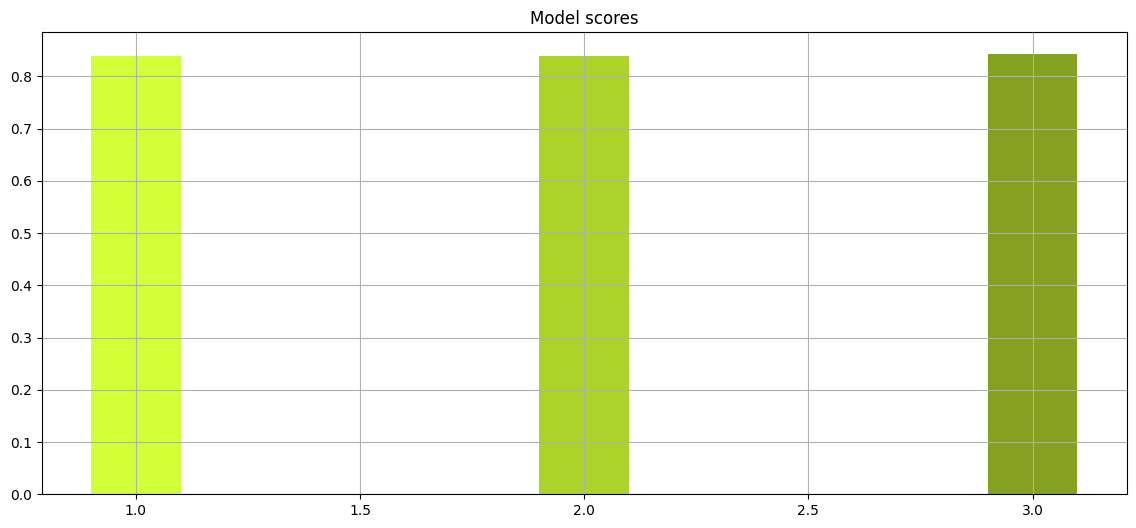

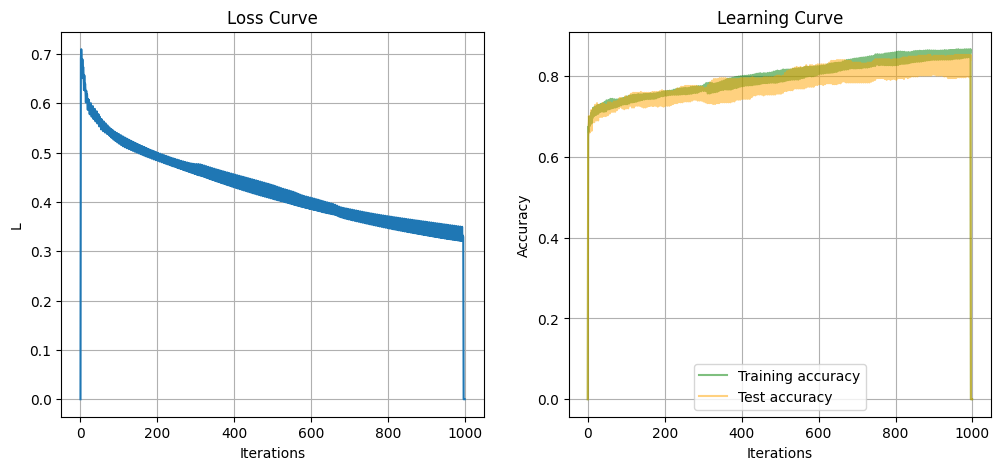

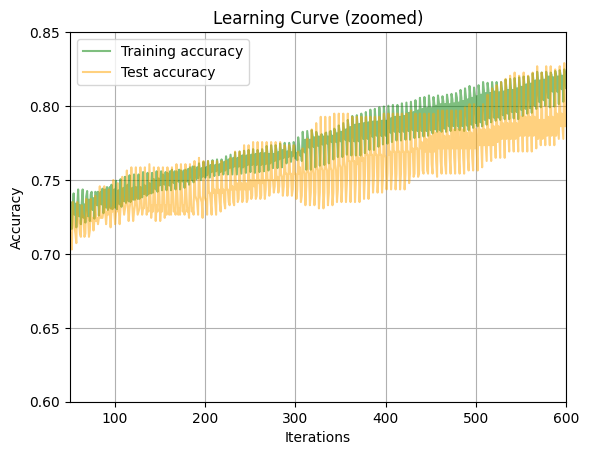

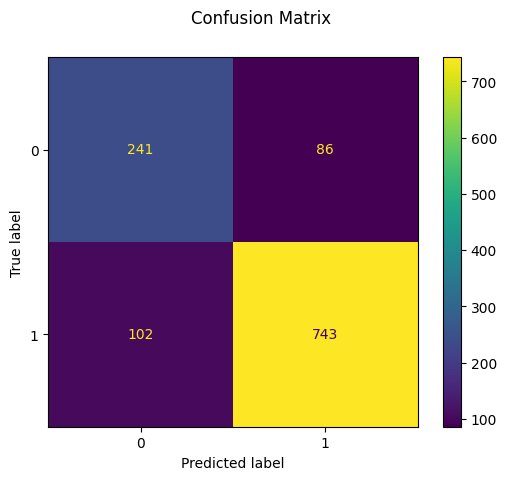

In [10]:
from local_lib.plotting import plotHist, plotDecisionBoundaries
plotHist(hist, y_test_simpler_reshaped,y_pred, zoomx=(50,600), zoomy=(0.6,0.85))

In [12]:
mnn.parameters["W1"].shape

(32, 35860)

In [13]:
added_data = (mnn.parameters["W1"] * 1 + mnn.parameters["b1"])

In [14]:
np.abs(added_data).min()

7.106621759289666e-06

In [15]:
added_data.shape

(32, 35860)

In [16]:
raw_data = np.sum(added_data, axis=0)

In [17]:
raw_data.shape

(35860,)

In [ ]:
np.random.randint(0,31)

16

In [18]:
raw_data.min()

-28.672788063855286

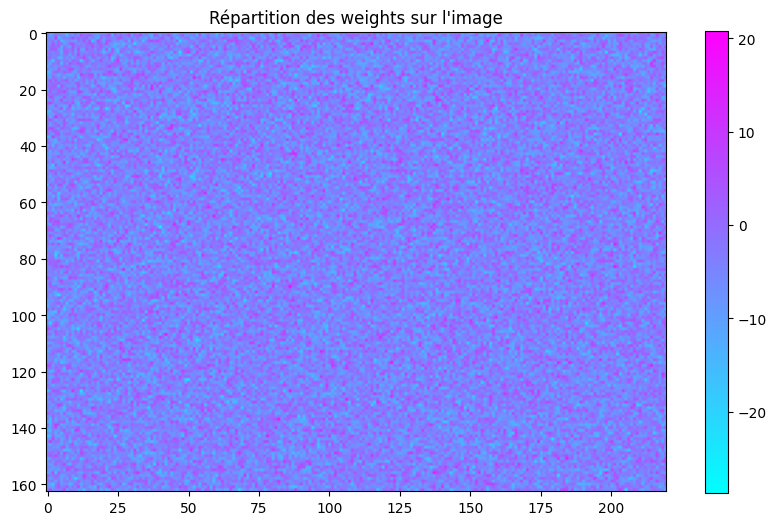

In [20]:
import matplotlib.pyplot as plt
from local_lib.common import common_height, common_width

image = raw_data.reshape(common_height, common_width)

plt.figure(figsize=(10, 6))
plt.imshow(image, cmap='cool')
plt.colorbar()
plt.title('Répartition des weights sur l\'image')
plt.show()

**Nothing really relevant seems to point out of this case study**